In [ ]:
!pip install --upgrade mplfinance

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
#from sklearn.metrics import mean_squagreen_error
import mplfinance as mpf
import warnings
import plotly.express as px
import plotly.graph_objects as go

#warnings.filterwarnings("ignore")

In [23]:
nvda = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=True)
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,212.000000,220.880005,210.789993,217.830002,217.556854,52570100
2022-04-19,217.199997,223.729996,213.139999,221.979996,221.701630,51278100
2022-04-20,225.169998,226.699997,212.000000,214.820007,214.550613,46897400
2022-04-21,217.089996,223.919998,200.000000,201.830002,201.576920,65620900
2022-04-22,203.029999,204.860001,195.000000,195.149994,194.905258,62471300


In [24]:
nvda.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,347.814860,354.282968,341.467410,348.312749,348.216026,5.062978e+07
std,212.871859,216.213821,208.876759,212.664718,212.705827,1.533720e+07
min,109.709999,117.349998,108.129997,112.269997,112.186241,1.679340e+07
25%,169.915000,174.192505,166.385006,169.942497,169.788742,4.014700e+07
50%,272.270005,276.050003,268.610001,272.085007,271.997772,4.781490e+07
75%,461.839996,469.599991,452.687492,462.045006,461.982704,5.820835e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,1.543911e+08


In [25]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-04-18 to 2024-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


<ipython-input-26-e358db3414b4>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



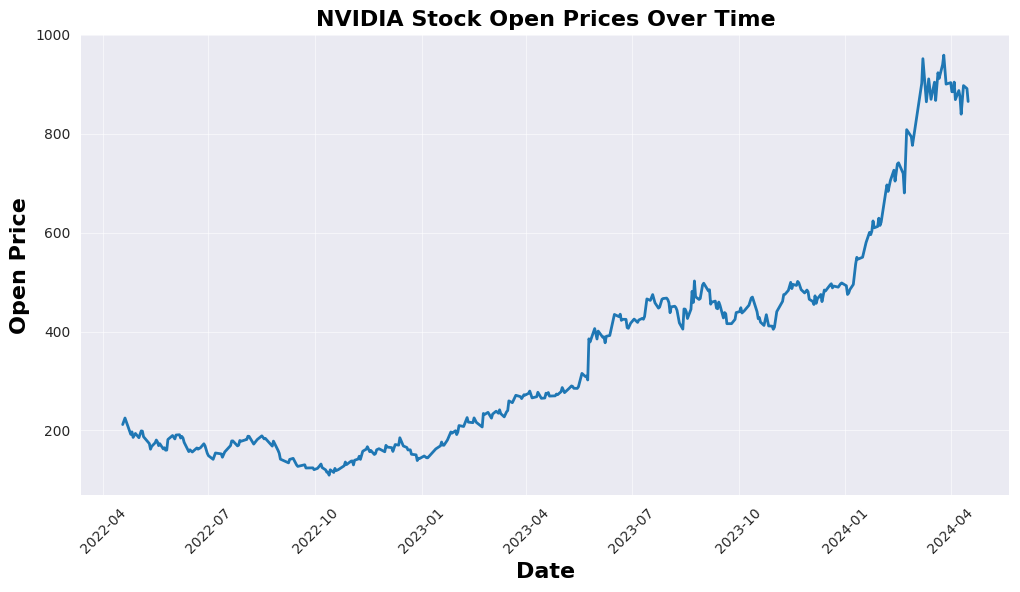

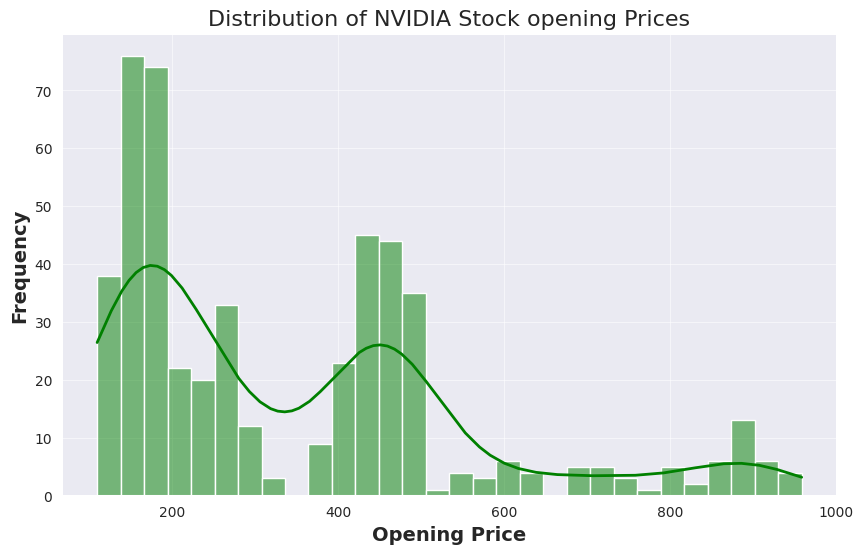

In [26]:
sns.set_style("darkgrid")
palette = sns.color_palette("Set2")

#Opening Prices Plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=nvda, x=nvda.index, y='Open', palette=palette)
plt.title('NVIDIA Stock Open Prices Over Time', fontsize=16, fontweight='bold', color='Black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='Black')
plt.ylabel('Open Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Distribution
plt.figure(figsize=(10, 6))
sns.histplot(nvda['Open'], bins=30, kde=True, color='green')
plt.title('Distribution of NVIDIA Stock opening Prices', fontsize=16)
plt.xlabel('Opening Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

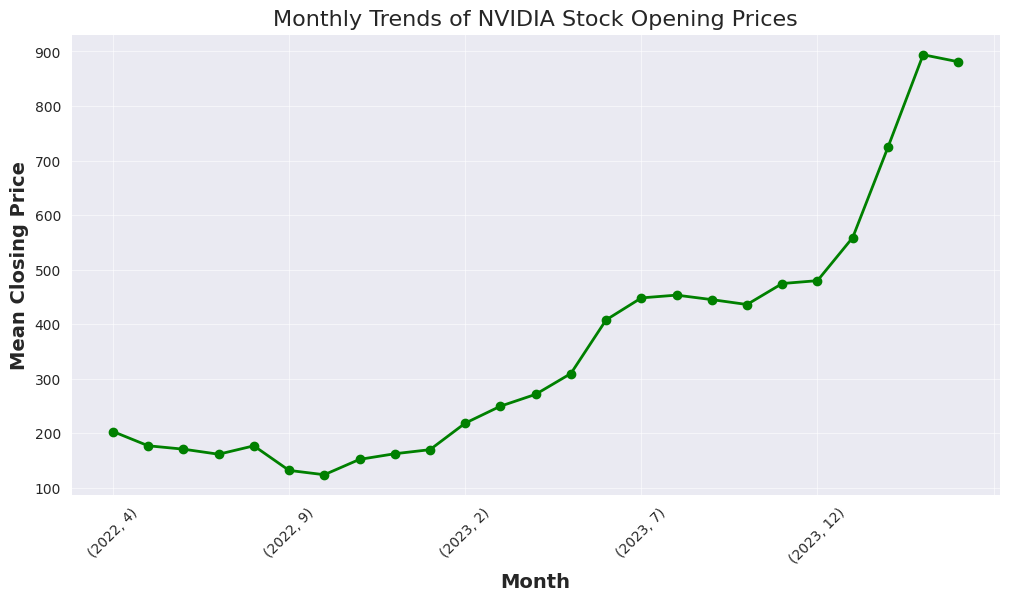

In [27]:
#Plot of monthly trends
nvda['Month'] = nvda.index.month
nvda['Year'] = nvda.index.year

monthly_mean = nvda.groupby(['Year', 'Month'])['Open'].mean()

plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o', color='green')
plt.title('Monthly Trends of NVIDIA Stock Opening Prices', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Closing Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-0144444120fb>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



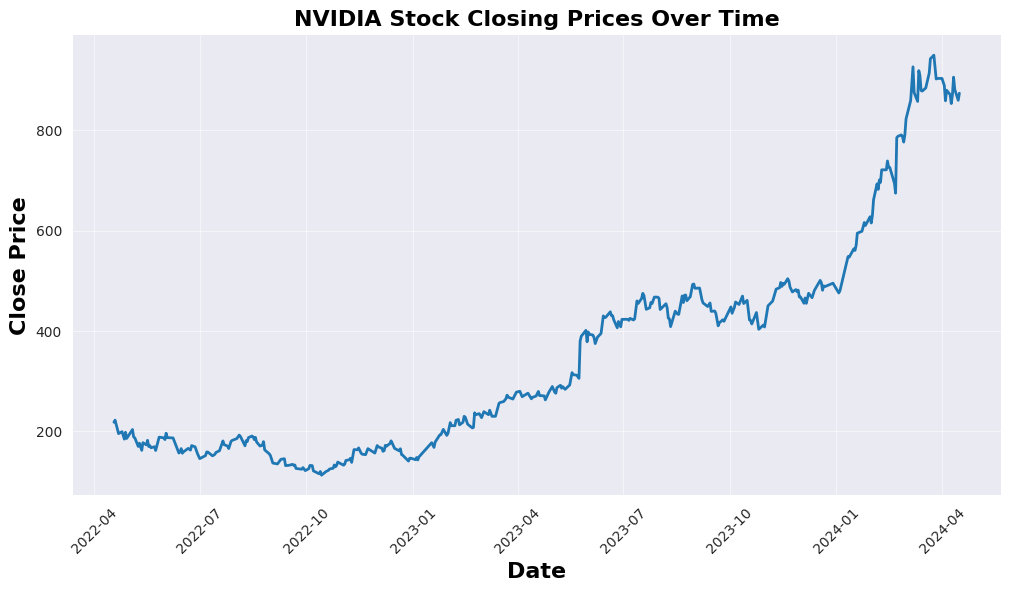

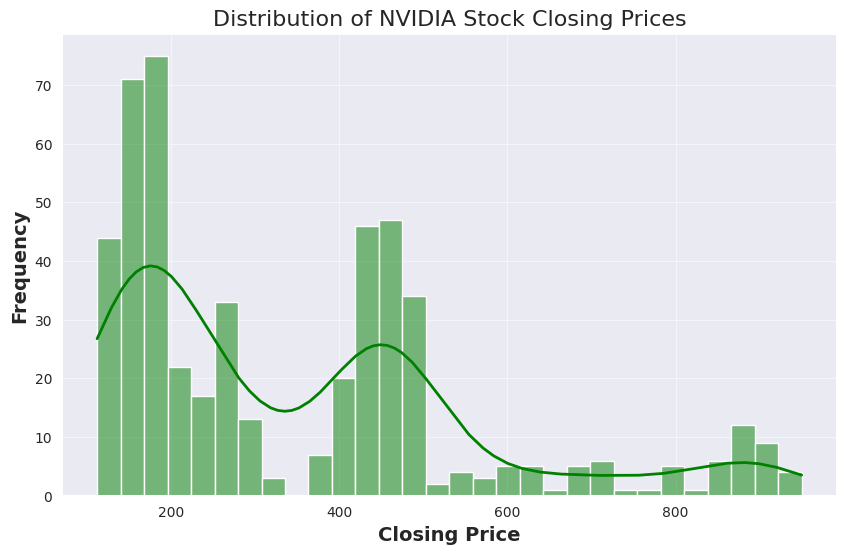

In [28]:
sns.set_style("darkgrid")
palette = sns.color_palette("flare")

#Closing Prices Plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=nvda, x=nvda.index, y='Close', palette=palette)
plt.title('NVIDIA Stock Closing Prices Over Time', fontsize=16, fontweight='bold', color='Black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='Black')
plt.ylabel('Close Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Distribution
plt.figure(figsize=(10, 6))
sns.histplot(nvda['Close'], bins=30, kde=True, color='green')
plt.title('Distribution of NVIDIA Stock Closing Prices', fontsize=16)
plt.xlabel('Closing Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

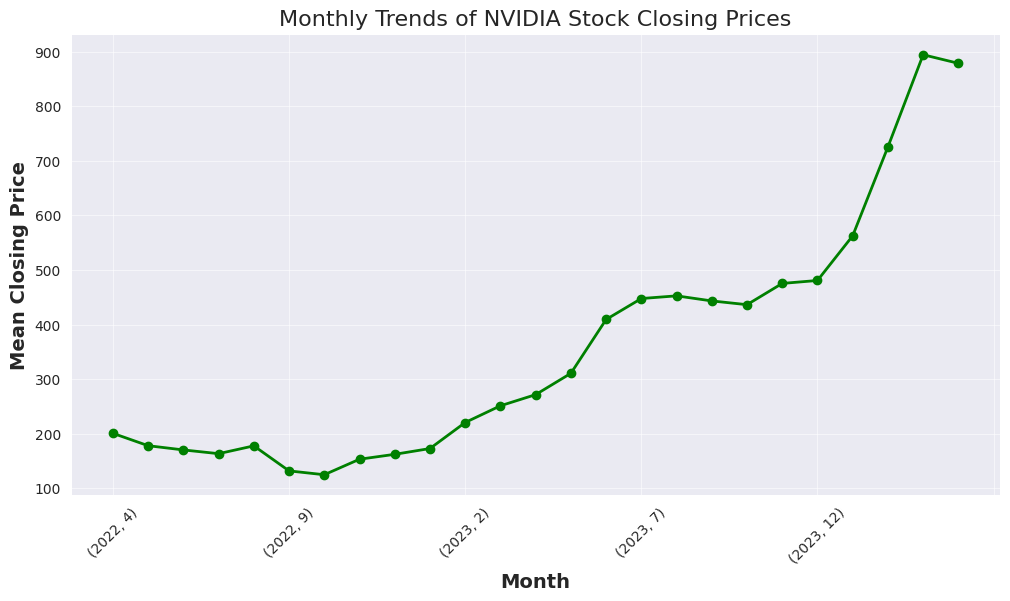

In [29]:
#Plot of monthly trends
nvda['Month'] = nvda.index.month
nvda['Year'] = nvda.index.year

monthly_mean = nvda.groupby(['Year', 'Month'])['Close'].mean()

plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o', color='green')
plt.title('Monthly Trends of NVIDIA Stock Closing Prices', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Closing Price', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-a9dc8c43b08e>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



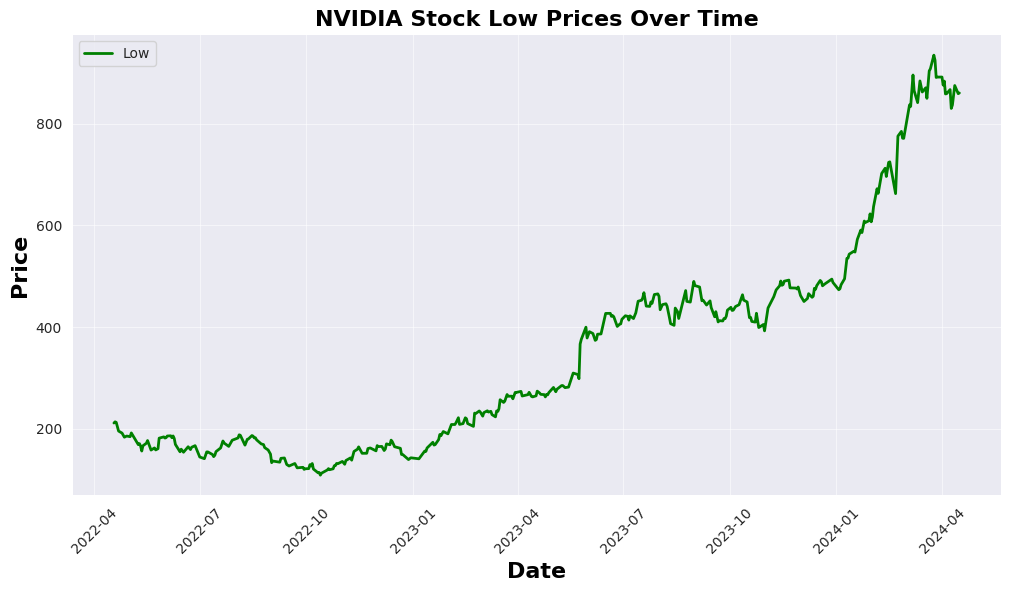

In [30]:
# Plot of the low prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=nvda, x=nvda.index, y='Low', palette=palette, label='Low', color='green')

plt.title('NVIDIA Stock Low Prices Over Time', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-31-0700192d5d12>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



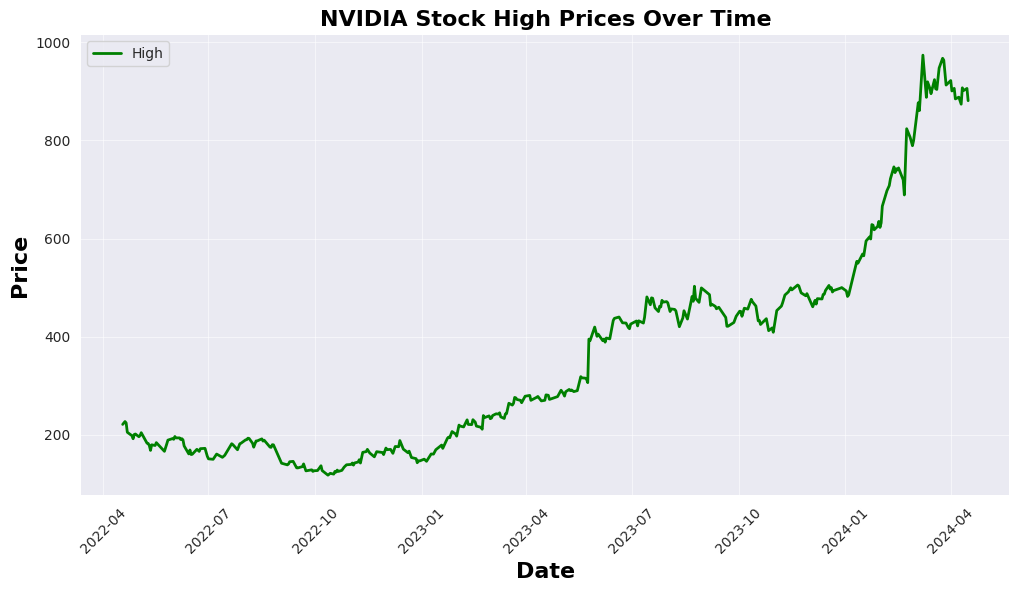

In [31]:
# Plotting High prices
plt.figure(figsize=(12, 6))
sns.lineplot(data=nvda, x=nvda.index, y='High', palette=palette, label='High', color='green')

plt.title('NVIDIA Stock High Prices Over Time', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Date', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Price', fontsize=16, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-32-84dd9bb21fcb>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-32-84dd9bb21fcb>:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-32-84dd9bb21fcb>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



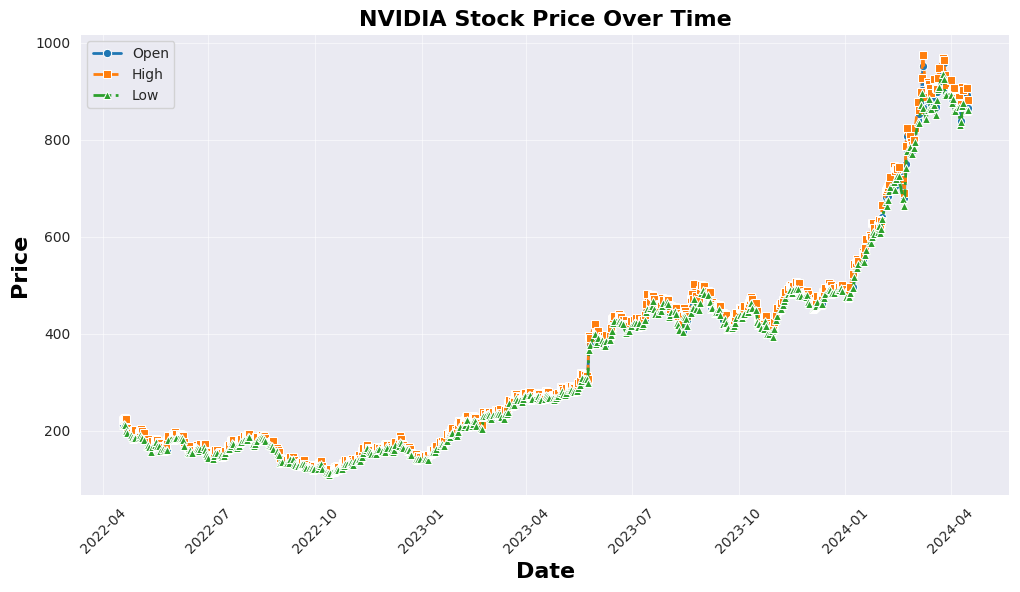

In [32]:
sns.set_style("darkgrid")
palette = sns.color_palette("Set2")  # Using the 'husl' color palette for vibrant colors

# Plot using Seaborn with vibrant colors
plt.figure(figsize=(12, 6))

# Plotting Open, High, and Low prices on the same graph with markers and line styles
sns.lineplot(data=nvda, x=nvda.index, y='Open', palette=palette, label='Open', marker='o', linestyle='-', linewidth=2)
sns.lineplot(data=nvda, x=nvda.index, y='High', palette=palette, label='High', marker='s', linestyle='--', linewidth=2)
sns.lineplot(data=nvda, x=nvda.index, y='Low', palette=palette, label='Low', marker='^', linestyle='-.', linewidth=2)

plt.title('NVIDIA Stock Price Over Time', fontsize=16, fontweight='bold', color='black')  # Adjust title properties
plt.xlabel('Date', fontsize=16, fontweight='bold', color='black')  # Adjust x-axis label properties
plt.ylabel('Price', fontsize=16, fontweight='bold', color='black')  # Adjust y-axis label properties
plt.xticks(rotation=45)
plt.legend()  # Add legend for better interpretation
plt.grid(True)  # Add grid for better visualization
plt.show()

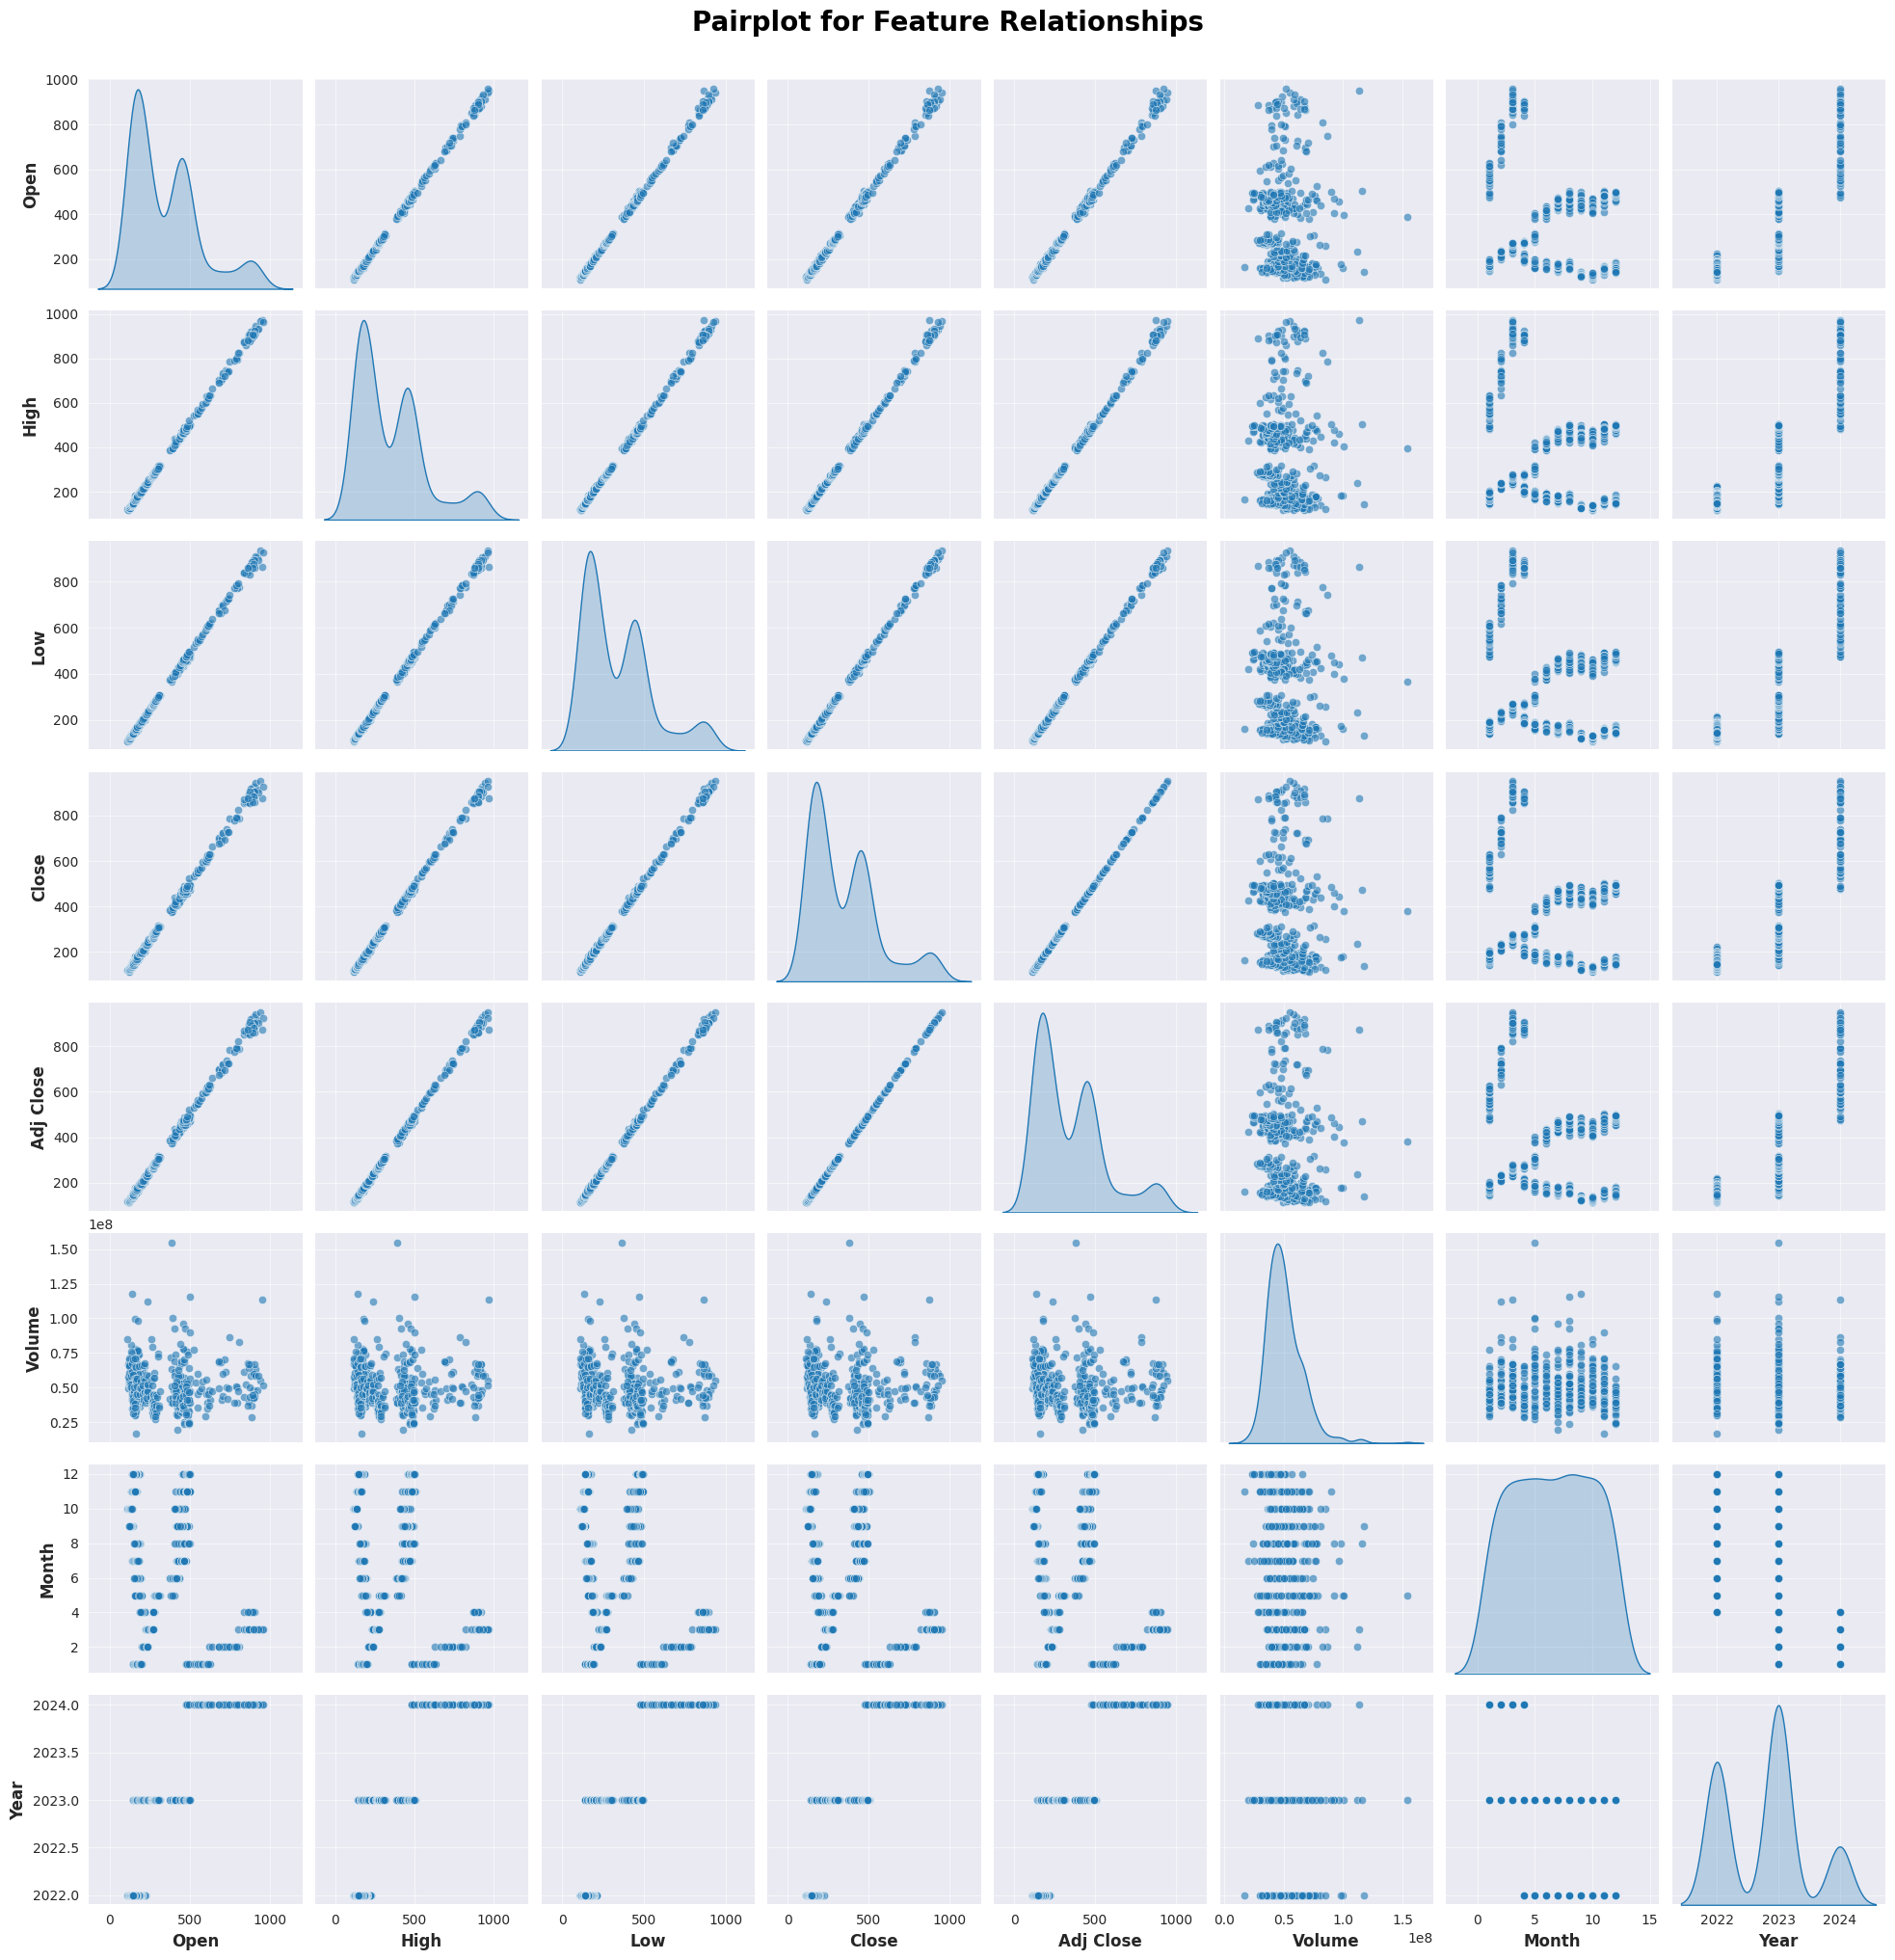

In [33]:
#Pair Plot
pairplot = sns.pairplot(nvda, diag_kind='kde', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot for Feature Relationships', fontsize=20, y=1.02, color='black')
pairplot.fig.set_facecolor('white')
plt.show()

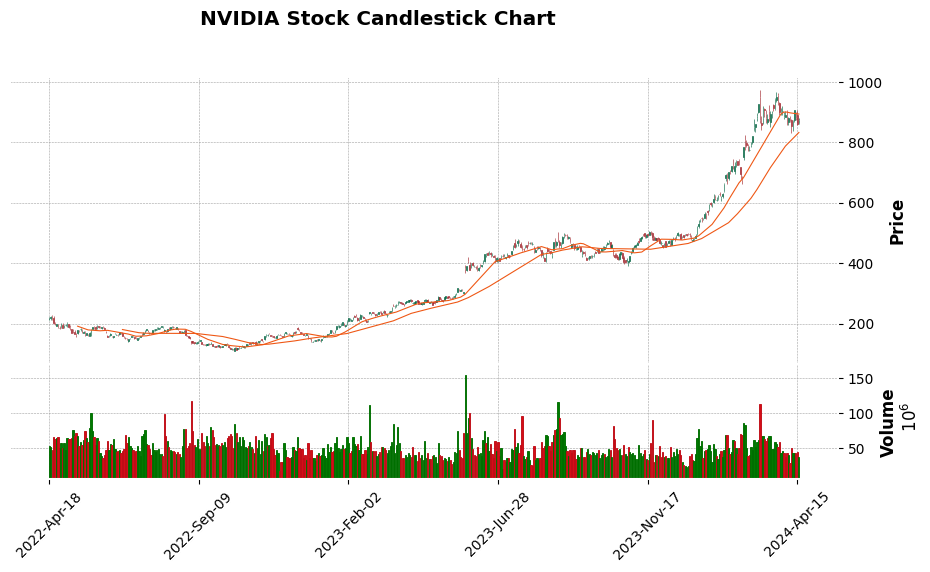

In [34]:
# Plot candlestick chart with moving averages
mpf.plot(nvda, type='candle', style='charles', mav=(20, 50),
         volume=True, title='NVIDIA Stock Candlestick Chart',
         ylabel='Price', ylabel_lower='Volume', figratio=(12, 6))

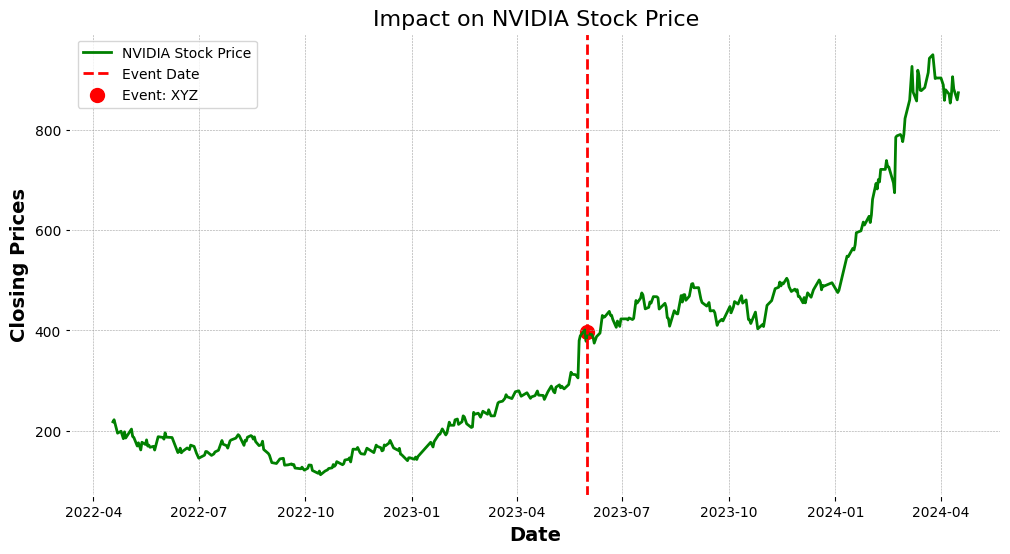

In [40]:
# Define event date and price
event_date = pd.Timestamp('2023-06-01')
event_price = nvda.loc[event_date, 'Close']

# Event Analysis
plt.figure(figsize=(12, 6))
plt.plot(nvda.index, nvda['Close'], color='green', label='NVIDIA Stock Price')
plt.axvline(x=event_date, color='red', linestyle='--', label='Event Date')
plt.scatter(event_date, event_price, color='red', s=100, label='Event: XYZ')
plt.title('Impact on NVIDIA Stock Price', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Prices', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [36]:
yearly_open = nvda.groupby(nvda['Year'])['Open'].sum().reset_index()
px.pie(yearly_open, values='Open', names='Year',
       title='Total Open Price by Year',
       color_discrete_sequence=['#A2D9D9', '#73C5C5', '#009596', '#003737'])

In [37]:
yearly_close = nvda.groupby(nvda['Year'])['Close'].sum().reset_index()
px.pie(yearly_close, values='Close', names='Year',
       title='Total Close Price by Year',
       color_discrete_sequence=['#A2D9D9', '#73C5C5', '#009596', '#003737'])

In [38]:
fig = go.Figure()
yearly_open_close = nvda.groupby('Year').agg({'Open': 'sum', 'Close': 'sum'}).reset_index()
fig.add_bar(x=yearly_open_close['Year'], y=yearly_open_close['Open'], name='Opening Price', marker_color='#73C5C5')
fig.add_bar(x=yearly_open_close['Year'], y=yearly_open_close['Close'], name='Closing Price', marker_color= '#009596')
fig.update_layout(title='Opening and Closing Prices Over the Years', xaxis_title='Year', yaxis_title='Price')